In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir

In [4]:
df_arr = {}

for folder in listdir("../measurements/csv"):
    df = pd.DataFrame(columns = ["Time (μs)", "Rx Voltage (mV)"])
    for file in sorted(listdir("../measurements/csv/" + folder)):
        df = df.append(pd.read_csv("../measurements/csv/" + folder + "/" + file, names=["Time (μs)", "Rx Voltage (mV)"])[2:], ignore_index=True)
    df = df.astype("float64")
    if float(folder) > 1000:
        df["Rx Voltage (mV)"] = df["Rx Voltage (mV)"].mul(1000)
    df_arr.update({folder:df})

In [5]:
summary = pd.DataFrame(columns = ["AWG Driving Voltage (mV)", "Maximum Rx Voltage (mV)", "Minimum Rx Voltage (mV)"])
for signal, df in df_arr.items():
    summary.loc[len(summary.index)] = [int(signal), df["Rx Voltage (mV)"].max(), df["Rx Voltage (mV)"].min()]
summary = summary.sort_values(by='Maximum Rx Voltage (mV)')

In [6]:
summary

,AWG Driving Voltage (mV),Maximum Rx Voltage (mV),Minimum Rx Voltage (mV)
2,500.0,151.8052,-153.4226
0,600.0,180.0348,-181.6523
4,700.0,212.6987,-215.1860
5,800.0,239.1583,-241.6608
1,900.0,270.0430,-276.9555
3,1000.0,300.9277,-303.4150
6,2000.0,594.5005,-595.6298


<AxesSubplot:title={'center':'AWG Driving Voltage vs. Rx Max Voltage'}, xlabel='AWG Driving Voltage (mV)', ylabel='Maximum Rx Voltage (mV)'>

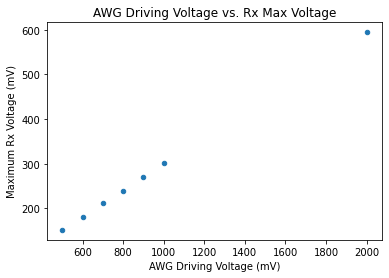

In [7]:
summary.plot.scatter(x="AWG Driving Voltage (mV)", y="Maximum Rx Voltage (mV)", title="AWG Driving Voltage vs. Rx Max Voltage")